In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

Logistic regression

In [100]:
datafile = 'data/ex2data1.txt'
data = np.loadtxt(datafile, delimiter = ',')
X = data[:,:-1]
y = data[:,-1].reshape(X.shape[0],1)
m = y.size

In [94]:
pos = np.array([i for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([i for i in range(X.shape[0]) if y[i] == 0])

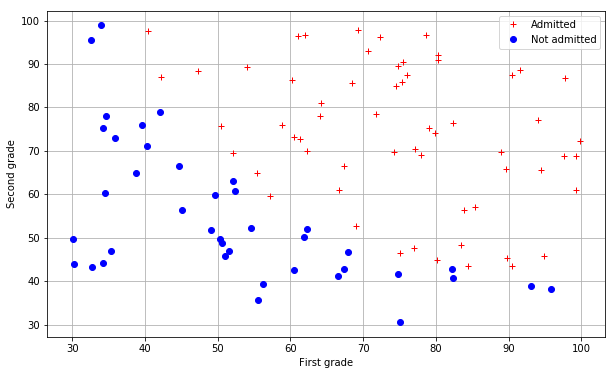

In [95]:
#plot the data
plt.figure(figsize = (10,6))
plt.plot(X[pos,0], X[pos, 1], 'r+', label = 'Admitted')
plt.plot(X[neg,0], X[neg, 1], 'bo', label = 'Not admitted')
plt.xlabel('First grade')
plt.ylabel('Second grade')
plt.legend()
plt.grid()

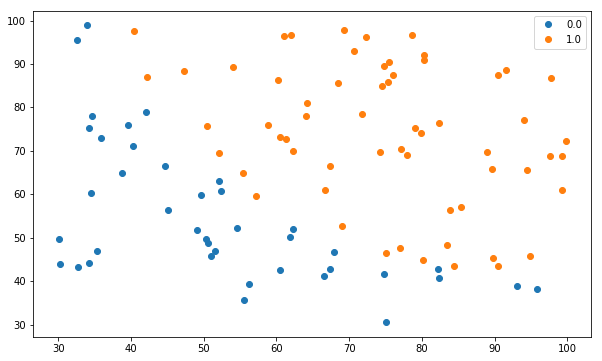

In [45]:
#plot using pandas
df = pd.DataFrame(data)
df.columns = ['X1','X2','Label']
groups = df.groupby('Label')

fig, ax = plt.subplots(figsize = (10,6))
for name, group in groups:
    ax.plot(group.X1, group.X2, marker = 'o', linestyle = '', label = name)
ax.legend()
plt.show()

In [60]:
#sigmoid function
from scipy.special import expit #(sigmoid function)

In [101]:
X = np.hstack([np.ones((X.shape[0],1)), X])

In [109]:
def h(theta, X):
    #X:m*n dimention
    #theta n*1 dimention
    return expit(np.dot(X, theta))
#computeCost
def computeCost(theta, X, y, mylambda = 0.):
    return (1./m) * (np.dot((-y).reshape(1,-1), np.log(h(theta, X))) \
                     - np.dot((1-y).reshape(1,-1), np.log(1 - h(theta, X))))\
                     + (mylambda/2./m) * np.dot(theta[1:].T, theta[1:])
def gradient(theta, X, y):
    temp = 0
    for i in range(theta.shape[0]):
        temp += np.dot(X[:,i].reshape(1,-1),(h(theta, X) - y))
    return (1./m) * temp

In [110]:
theta = np.zeros((X.shape[1], 1))
ans = computeCost(theta, X, y)
print("Correct cost should be 0.693, my answer is %0.3f" % ans)

Correct cost should be 0.693, my answer is 0.693


In [111]:
#optimization
from scipy.optimize import fmin
def optimize(theta, X, y, mylambda = 0.):
    result = fmin(computeCost, x0 = theta, args = (X, y, mylambda), maxiter = 500, full_output = True)
    #return theta, cost
    return result[0], result[1]
op_theta, op_cost = optimize(theta, X, y)
print('cost should be about 0.203, my op_cost is %0.3f' % op_cost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
cost should be about 0.203, my op_cost is 0.203


In [86]:
#predict
x_test = np.array([1., 45., 85.])
y_test = h(op_theta, x_test)
print('should be 0.776, my ans is %0.3f' % y_test)

def predict(theta, X):
    #y = np.zeros((X.shape[0], 1))
    return np.round(h(theta, X))
accuracy = predict(op_theta, X).reshape(-1, 1) == y
print('accuracy should be about 0.89, my accuracy is %0.3f' % np.mean(accuracy))

should be 0.776, my ans is 0.776
accuracy should be about 0.89, my accuracy is 0.890


Regularized logistic regression 

In [96]:
datafile2 = 'data/ex2data2.txt'
data2 = np.loadtxt(datafile2, delimiter = ',')
X = data2[:,:-1]
y = data2[:,-1].reshape(X.shape[0], 1)
m = y.size
X = np.hstack([np.ones((X.shape[0], 1)), X])
pos = [i for i in range(X.shape[0]) if y[i] == 1]
neg = [i for i in range(X.shape[0]) if y[i] == 0]

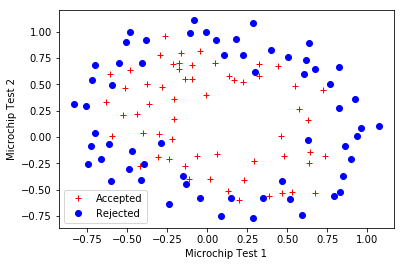

In [99]:
plt.plot(X[pos, 1], X[pos, 2], 'r+', label = 'Accepted')
plt.plot(X[neg, 1], X[neg, 2], 'bo', label = 'Rejected')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

In [128]:
#feature mapping
def featureMap(col1, col2, degree = 6):
    #input is two m*1 dimention array
    out = np.ones((col1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            temp = ((col1 ** (i-j)) * (col2 ** j)).reshape(-1, 1)
            out = np.hstack([out, temp])
    return out

In [130]:
X = np.hstack([np.ones((X.shape[0], 1)), featureMap(X[:,1], X[:,2])])
theta = np.zeros((X.shape[1], 1))
mylambda = 1
cost = computeCost(theta, X, y, mylambda)
print('cost should be about 0.693, my accuracy is %0.3f' % cost)

cost should be about 0.693, my accuracy is 0.693


In [131]:
#optimization
from scipy.optimize import minimize
def optimizeRegularization(theta, X, y, mylambda = 0.):
    result = minimize(computeCost, x0 = theta, args = (X, y, mylambda), method='BFGS', options={"maxiter":500, "disp":False})
    return np.array(result.x), result.fun
op_theta, op_cost = optimizeRegularization(theta, X, y, mylambda)

In [132]:
op_cost

0.673011669359582